# Exploratory data analysis

## Setup

In [1]:
import platform; print(platform.platform())
import sys; print("Python", sys.version)

Windows-10-10.0.19045-SP0
Python 3.10.5 (tags/v3.10.5:f377153, Jun  6 2022, 16:14:13) [MSC v.1929 64 bit (AMD64)]


In [2]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('../data/final/train.csv')
test = pd.read_csv('../data/final/test.csv')

train.sample(5)

HomePlanet  CryoSleep    Destination        Age    VIP  RoomService  \
1273       Mars      False    TRAPPIST-1e  (50, 120]  False     4.844187   
3755     Europa       True    TRAPPIST-1e   (17, 25]  False     0.000000   
5904      Earth      False  PSO J318.5-22   (30, 40]  False     0.000000   
678       Earth       True    55 Cancri e    (0, 12]  False     0.000000   
1100      Earth      False  PSO J318.5-22   (17, 25]  False     3.332205   

      FoodCourt  ShoppingMall       Spa    VRDeck  Expenditure  NoSpending  \
1273   0.000000       4.85203  2.484907  7.239933     7.413367       False   
3755   0.000000       0.00000  0.000000  0.000000     0.000000        True   
5904   6.204558       0.00000  0.000000  5.365976     6.562444       False   
678    0.000000       0.00000  0.000000  0.000000     0.000000        True   
1100   0.000000       0.00000  6.498282  0.000000     6.538140       False   

     CabinDeck CabinSide  GroupSize   Solo    CabinGroup  FamilySize  \
1273         F         S          2  False  (1200, 1500]           9   
3755         B         P          3  False    (-10, 300]           9   
5904         G         S          1   True  (1200, 1500]          11   
678          G         P          7  False   (900, 1200]          12   
1100         F         P          1   True  (1500, 1800]           9   

      Transported  
1273            1  
3755            0  
5904            1  
678             0  
1100            0

In [4]:
train.isna().sum().sum()

0

In [5]:
TARGET = 'Transported'
FEATURES = [col for col in train.columns if col not in [TARGET]]

numerical = train[FEATURES].select_dtypes(include=np.number).columns
categorical = train[FEATURES].select_dtypes(exclude=np.number).columns

print(f'Target: {TARGET}')
print(f'Features:\n\tnumerical: {numerical.to_list()}\n\tcategorical:{categorical.to_list()}')
print(f'Shapes:\n\ttrain: {train.shape}\n\ttest: {test.shape}')

Target: Transported
Features:
	numerical: ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Expenditure', 'GroupSize', 'FamilySize']
	categorical:['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'NoSpending', 'CabinDeck', 'CabinSide', 'Solo', 'CabinGroup']
Shapes:
	train: (8693, 19)
	test: (4277, 18)


In [6]:
os.makedirs('figures/eda_2', exist_ok=True)
plt.rcParams["figure.figsize"] = (1.618* 5, 5)
sns.set_style('darkgrid')
sns.set_palette('muted')

## Response marginal analysis

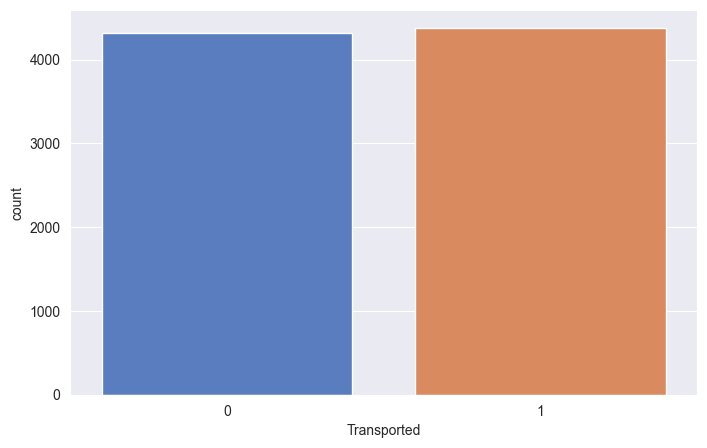

In [7]:
sns.countplot(x=TARGET, data=train)
plt.savefig('./figures/eda_2/response_marginal.png')

## Features marginal analysis

### Categorical features

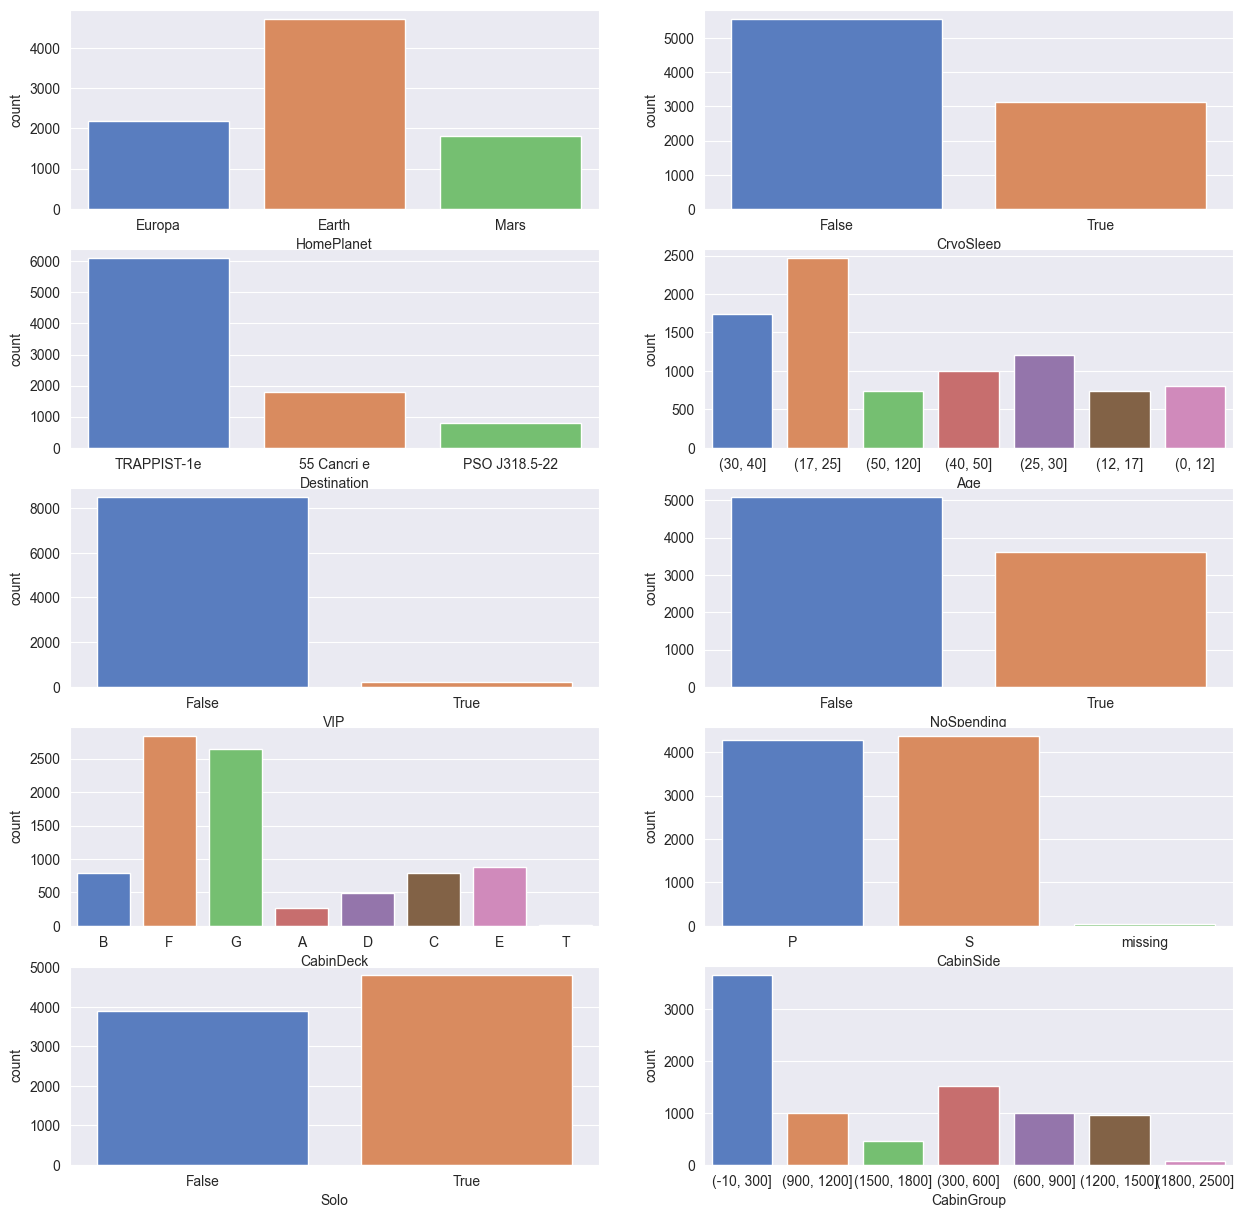

In [8]:
# countplot of categorical features
fig, axs = plt.subplots(5, 2, figsize = (15, 15))
for ax, c in zip(axs.flatten(), categorical):
    sns.countplot(x=c, data=train, ax=ax)
plt.savefig('./figures/eda_2/categorical_marginal.png')

### Numerical features

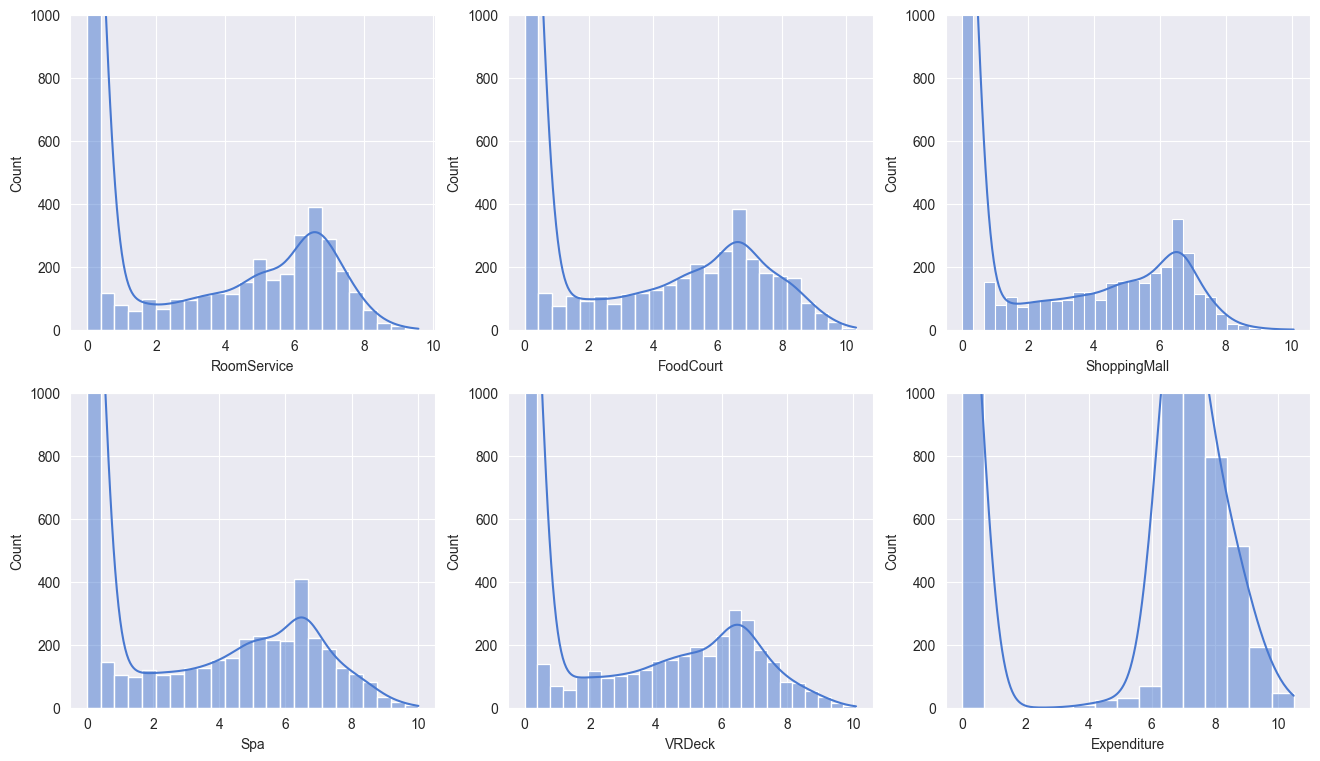

In [9]:
# distribution of expenditure features
exp_feats = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Expenditure']
fig, axs = plt.subplots(2, 3, figsize = (16, 9))
for ax, c in zip(axs.flatten(), exp_feats):
    sns.histplot(x=c, data=train, kde=True, ax=ax).set(ylim=[0, 1000])
plt.savefig('./figures/eda_2/numerical_marginal.png')

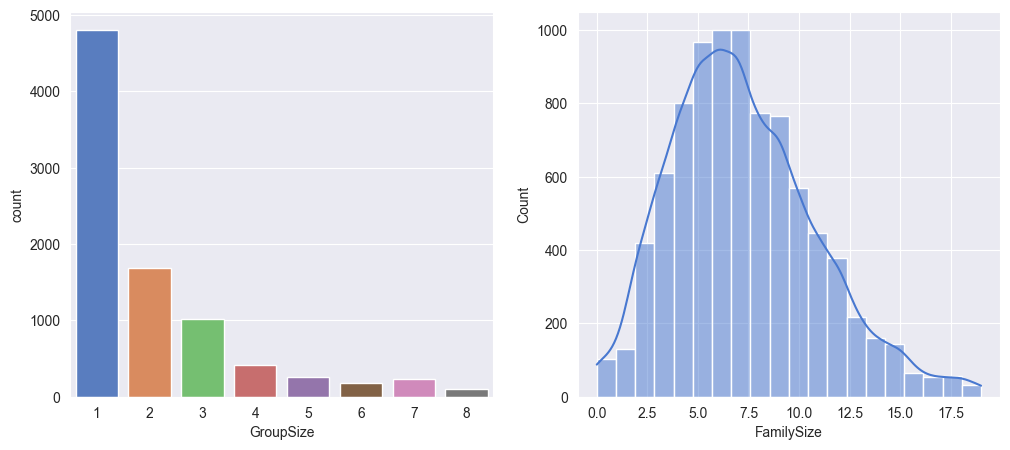

In [10]:
# distribution of faimily and group size features 
size_feats = ['GroupSize', 'FamilySize']
fig, axs = plt.subplots(1, 2, figsize = (12, 5))

sns.countplot(x='GroupSize', data=train, ax=axs[0])
sns.histplot(x='FamilySize', data=train, bins=20, kde=True, ax=axs[1])

plt.savefig('./figures/eda_2/numerical_marginal.png')

<Figure size 1200x1200 with 0 Axes>

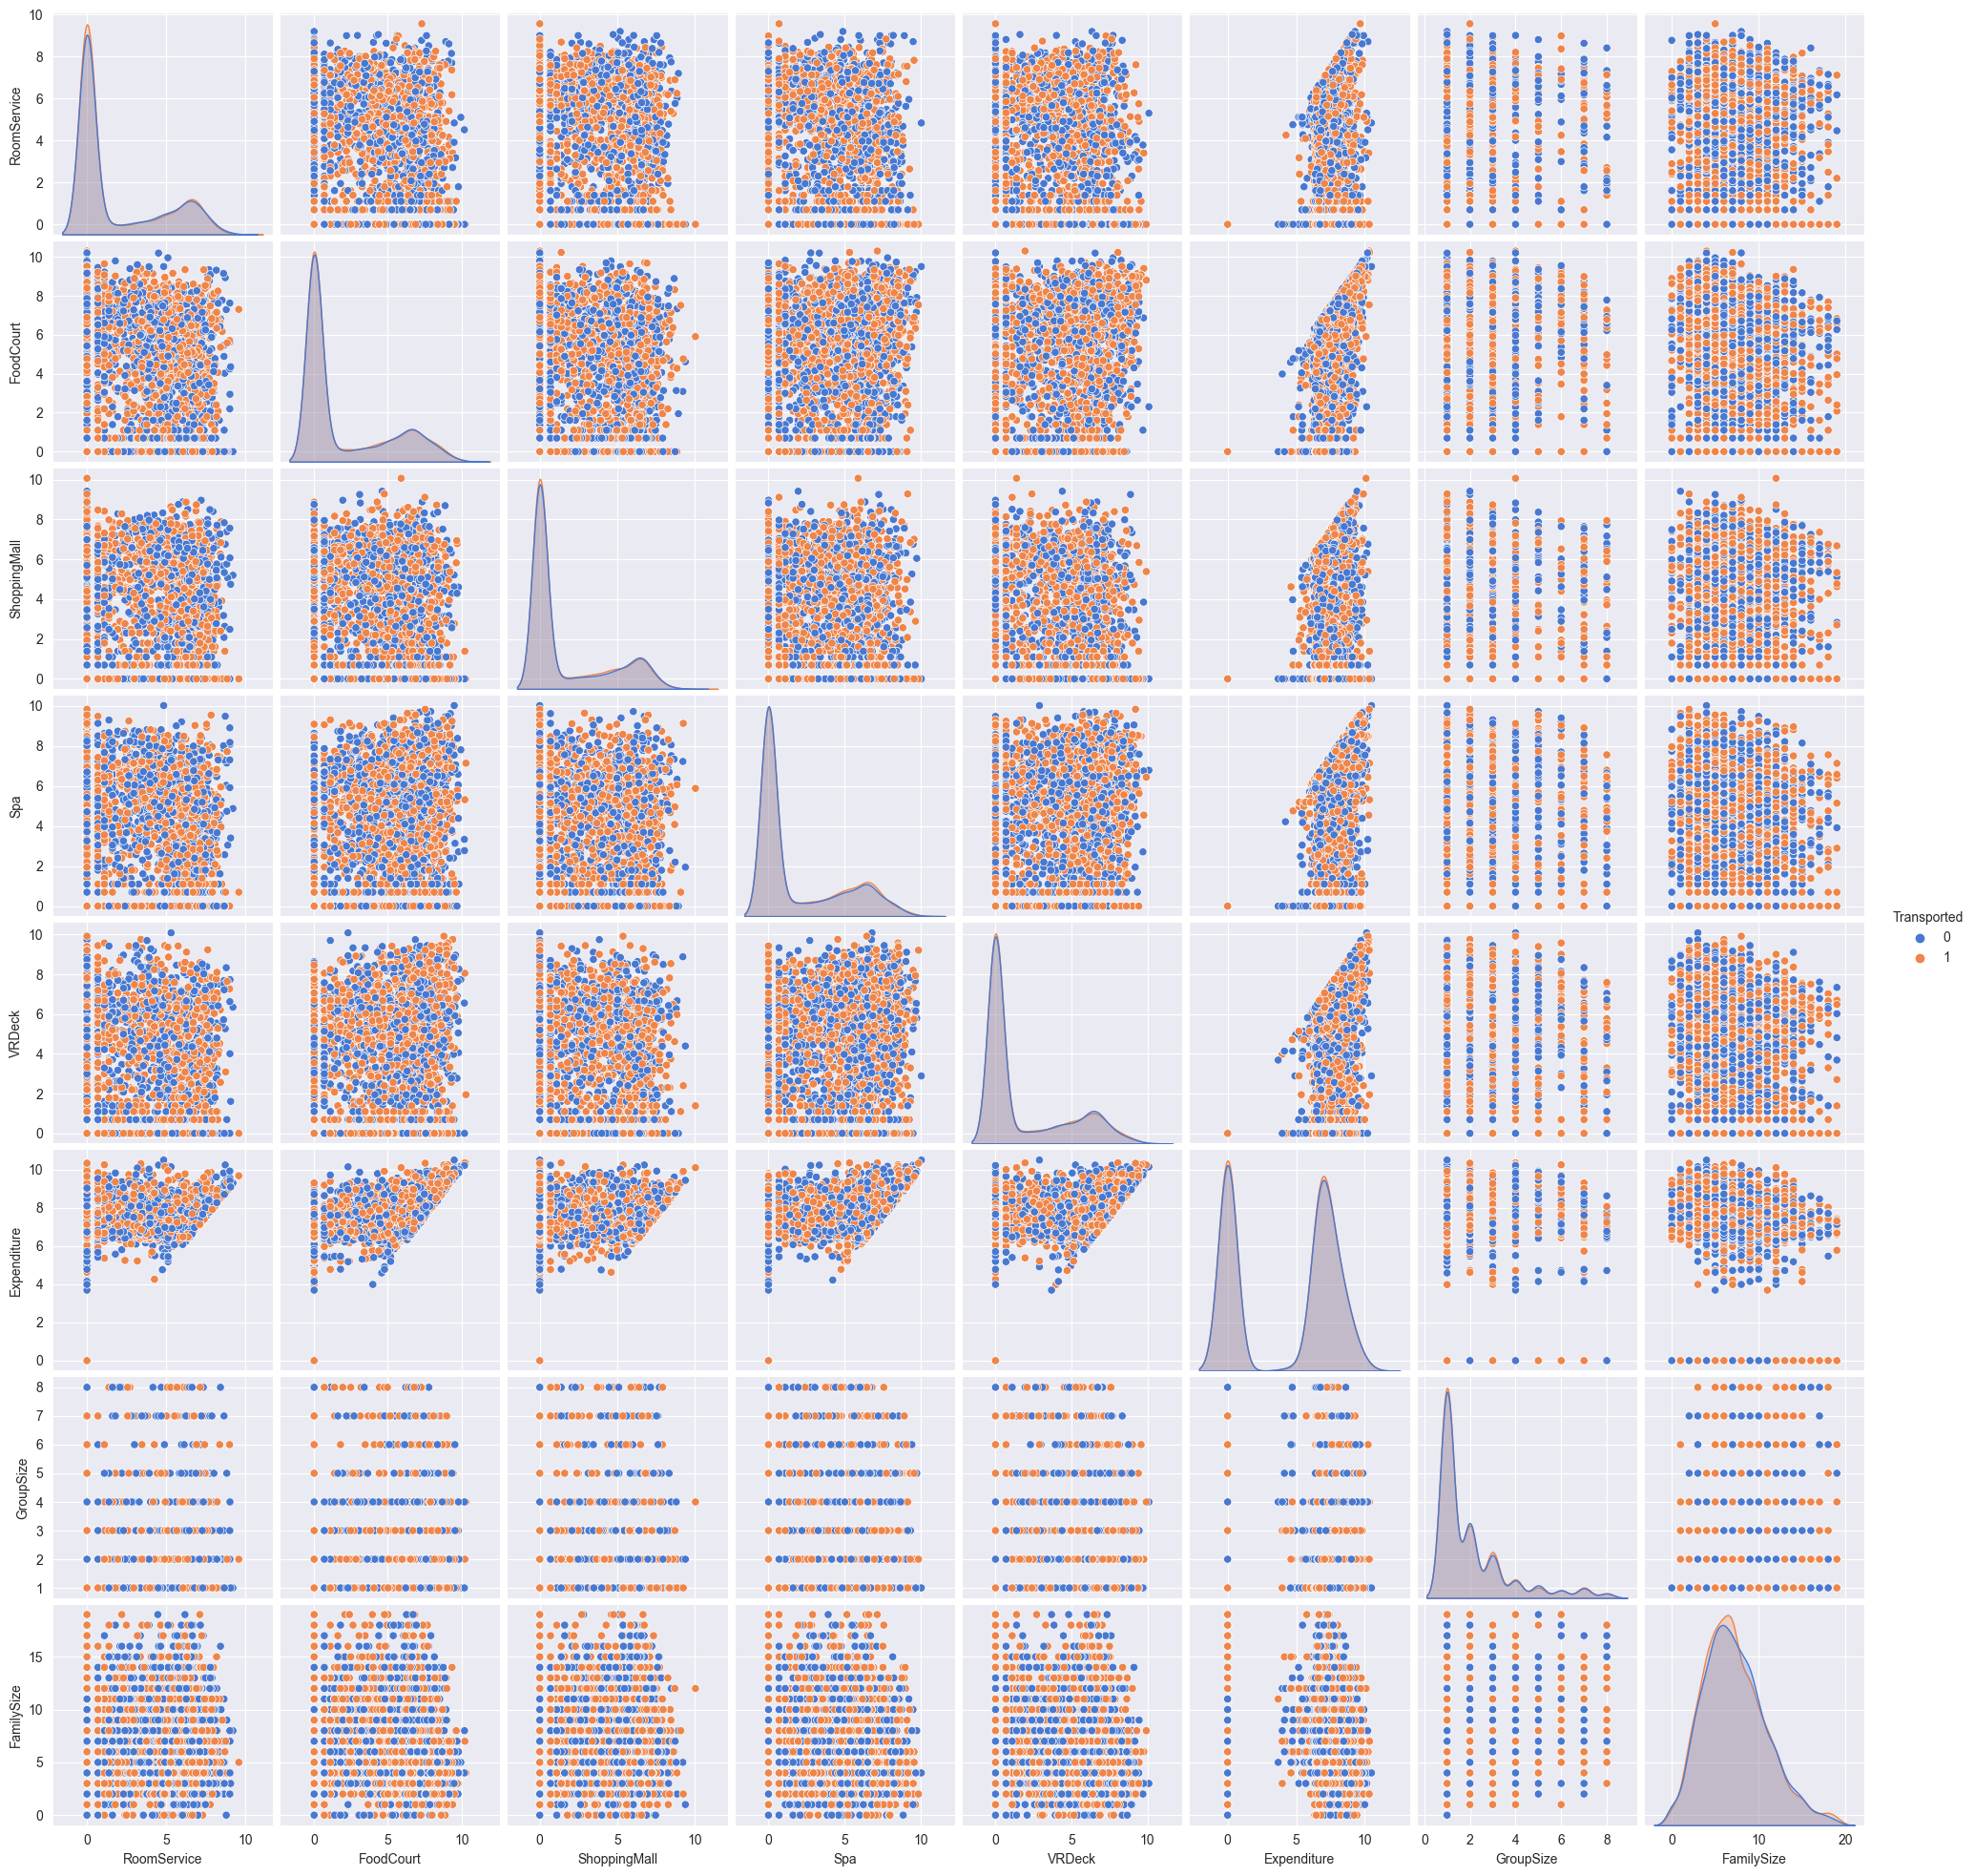

In [11]:
# numerical features
fig = plt.figure(figsize=(12, 12))
sns.pairplot(train, vars = numerical, hue= TARGET, height=2.5)
plt.savefig('./figures/eda_2/numerical_pairplot.png')

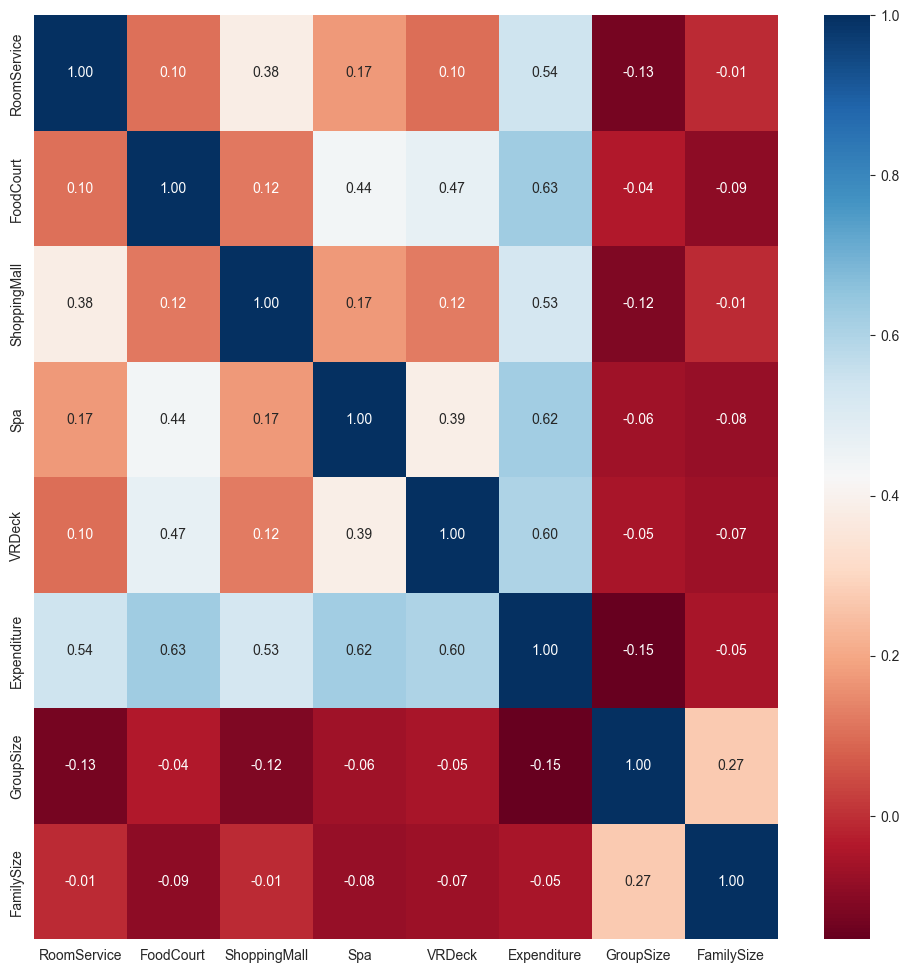

In [12]:
# correlation between numerical variables
fig = plt.figure(figsize=(12, 12))     
sns.heatmap(train[numerical].corr(), annot=True, fmt = ".2f", cmap = "RdBu")
plt.savefig('./figures/eda_2/numerical_corrmap.png')

## Bivariate analysis

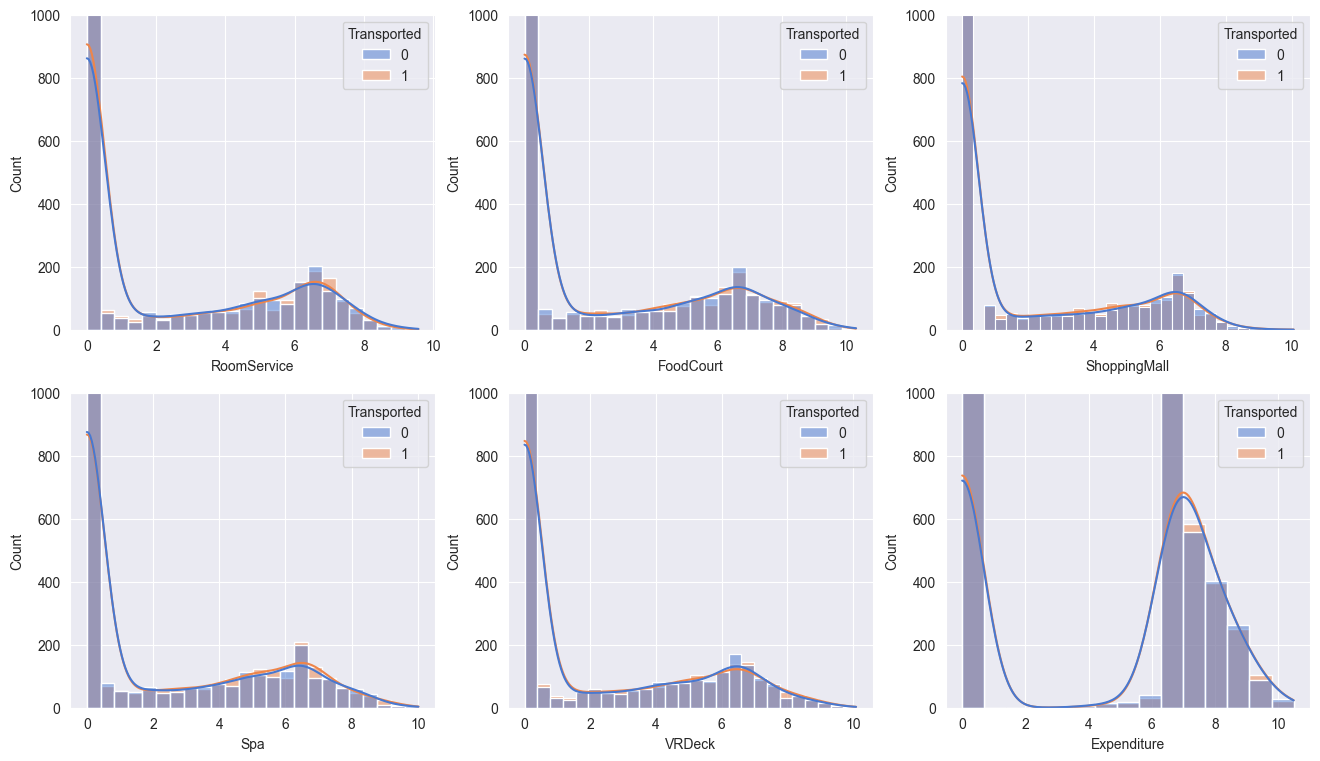

In [13]:
# distribution of expenditure features
exp_feats = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Expenditure']
fig, axs = plt.subplots(2, 3, figsize = (16, 9))
for ax, c in zip(axs.flatten(), exp_feats):
    sns.histplot(x=c, data=train, kde=True, hue=TARGET, ax=ax).set(ylim=[0, 1000])
plt.savefig('./figures/eda_2/numerical_marginal.png')

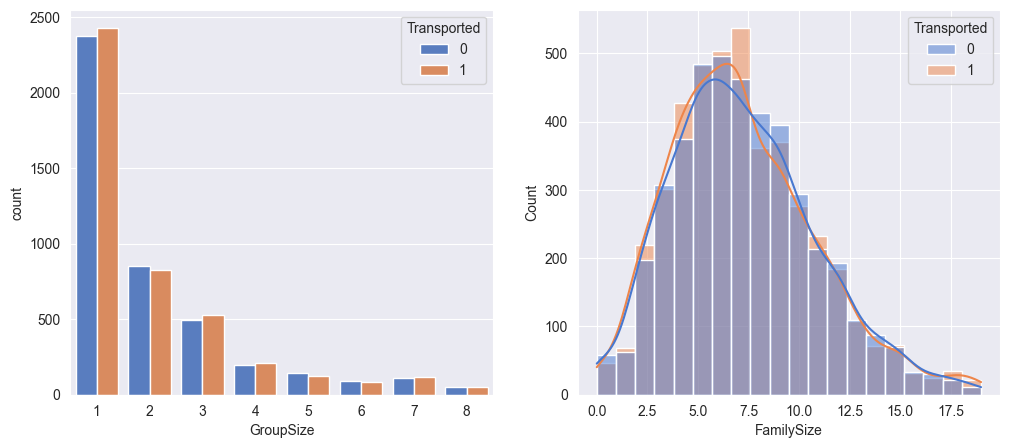

In [14]:
# distribution of faimily and group size features 
size_feats = ['GroupSize', 'FamilySize']
fig, axs = plt.subplots(1, 2, figsize = (12, 5))

sns.countplot(x='GroupSize', data=train, hue=TARGET, ax=axs[0])
sns.histplot(x='FamilySize', data=train, bins=20, kde=True, hue=TARGET, ax=axs[1])

plt.savefig('./figures/eda_2/numerical_marginal.png')

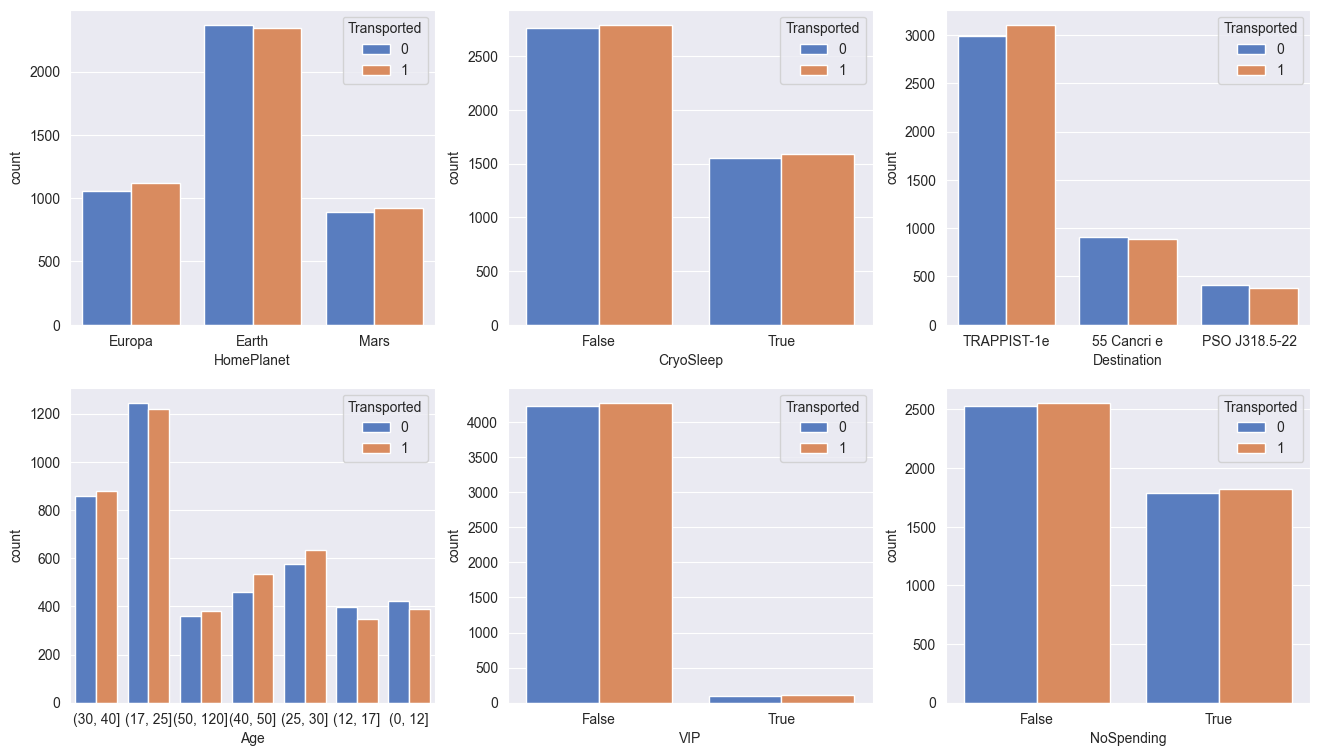

In [15]:
# countplot of categorical features by response value
fig, axs = plt.subplots(2, 3, figsize = (16, 9))
for ax, c in zip(axs.flatten(), categorical):
    sns.countplot(x=c, hue=TARGET, data=train, ax=ax)
plt.savefig('./figures/eda_2/numerical_bivariate.png')